In [1]:
import pandas as pd
import numpy as np
from DS_healpix_fragmentation import *
from DS_data_transformation import *
import DS_Coma_Cluster_param as cc_prm

In [2]:
df = pd.read_csv('/home/rt2122/Data/coma_sweep/south/circle_2degree_filtered.csv')
df = n_max_flux_df(df, 100, ['FLUX_G', 'FLUX_R', 'FLUX_Z'])

In [3]:
matr = np.load('/home/rt2122/Data/coma_sweep/south/true_matr.npy')

In [4]:
mdict = matr2dict(matr)

In [5]:
def draw_circles(ra, dec, nside, shape, mdict, data, coef=0.02):
    from skimage.draw import circle
    
    pic = np.zeros(shape)
    coef = shape[0] * coef / max(data) 
    pix = radec2pix(ra, dec, nside)
    coords = [(*mdict[pix[i]], data[i]) for i in range(data.shape[0]) 
              if pix[i] in mdict]
    for x, y, flux in coords:
        pic[circle(x, y, coef*flux, shape=shape)] = 1
    return pic

In [6]:
mask = draw_circles(df['RA'], df['DEC'], 65536, (2048, 2048), mdict, 
                    df['FLUX_G'] + df['FLUX_R'] + df['FLUX_Z'])

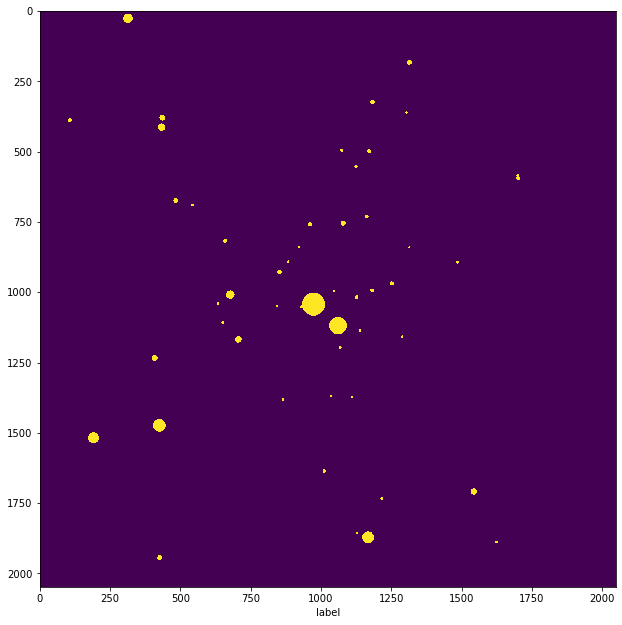

In [7]:
show_pic(mask)